Further  
 
Errors: 
5 vs '5'

## Mnist 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28, 28)

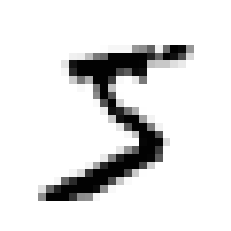

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(some_digit_img, cmap='Greys')
plt.axis('off')
plt.show()

In [7]:
y[0]

'5'

In [8]:
some_digits = X[:16]
some_digits_img = some_digits.reshape(16, 28, 28)

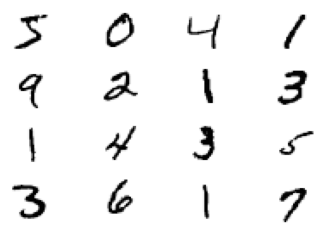

In [9]:
fig, axes = plt.subplots(4, 4)
for row in range(4):
    for col in range(4): 
        axes[row, col].imshow(some_digits_img[row*4+col], cmap='Greys')
        axes[row, col].axis('off')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Train a binary classifier 

In [11]:
y_train_5 = y_train == '5' 
y_pred_5 = y_test == '5'
y_train_5, y_train
##mm bug here 

(array([ True, False, False, ...,  True, False, False]),
 array(['5', '0', '4', ..., '5', '6', '8'], dtype=object))

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf =SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
## stochastic = random: gradient descent
## y_train will work 

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict(X[:16])

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False])

## Performance Measures 

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train, y_train_5,
                        scoring = 'accuracy', cv = 5)

In [15]:
scores

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [16]:
from sklearn.base import BaseEstimator 
import numpy as np 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype='bool')
    ## return (len(X), 1)

In [17]:
never5_clf = Never5Classifier()
scores = cross_val_score(never5_clf, X_train, y_train_5,
                        scoring = 'accuracy', cv = 5)
## scoring = 'accuracy' : default 

In [18]:
scores

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, 
                                   cv = 5)

In [20]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [21]:
y_train_never5_pred = cross_val_predict(never5_clf, X_train, y_train_5, 
                                        cv = 5)

In [22]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

In [23]:
confusion_matrix(y_train_5, y_train_never5_pred)

array([[54579,     0],
       [ 5421,     0]])

In [24]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)
## precision TP /(TP+FP) positive 
## recall TP / (TP+FN) reality 
## f1_score = 2 / (precision**-1 + recall**-1)

(0.7547327860613168, 0.8310274857037447)

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [26]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score 
## sgd_clf vs svc 

array([2164.22030239])

In [27]:
threshold = 8000
some_digit_pred = some_digit_score > threshold
some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            cv=5, method='decision_function') 

In [29]:
y_scores.shape
## get the decision function result to set threshold 

(60000,)

In [30]:
from sklearn.metrics import precision_recall_curve 

In [31]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
p90_index = np.argmax(precision>=0.9)
precision[p90_index], recall[p90_index], thresholds[p90_index]
## precision = 90% find the first True element 

(0.9002016129032258, 0.6589190186312488, 3045.9258227053638)

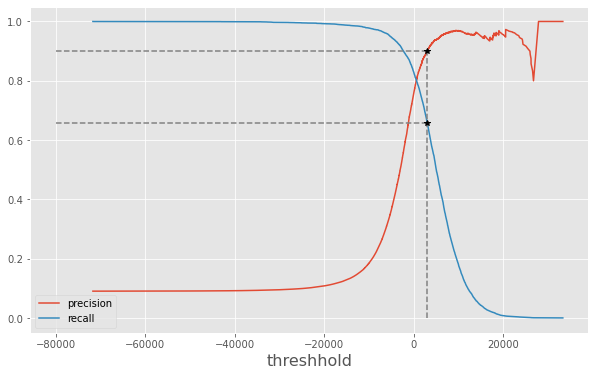

In [33]:
def plot_precision_reall_vs_thresholds(precision, recall, thresholds, p_demand=0.9):
    plt.figure(figsize=(10, 6))
    plt.style.use('ggplot')
    plt.plot(thresholds, precision[:-1], label='precision')
    plt.plot(thresholds, recall[:-1], label='recall')
    plt.xlabel('threshhold', fontsize=16)
    plt.legend()
    
    p90_index = np.argmax(precision>=p_demand) 
    plt.plot([thresholds[p90_index],thresholds[p90_index]], [0, 0.9], '--', c='grey')
    plt.plot([-80000,thresholds[p90_index]], [0.9, 0.9], '--', c='grey')
    plt.plot([-80000,thresholds[p90_index]], [recall[p90_index], recall[p90_index]], '--', c='grey')
    plt.plot(thresholds[p90_index],0.9, '*', c = 'black')
    plt.plot(thresholds[p90_index], recall[p90_index],  '*', c = 'black' )

plot_precision_reall_vs_thresholds(precision, recall, thresholds)
plt.show()
## 'ggplot' from R 


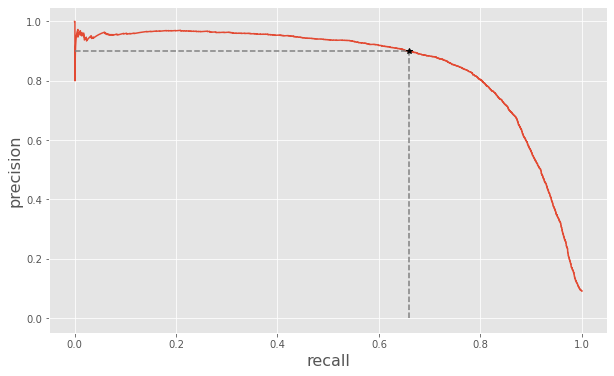

In [34]:
def plot_precision_vs_recall(precision, recall, p_demand=0.9):
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision)
    plt.xlabel('recall', fontsize=16)
    plt.ylabel('precision', fontsize=16)
    
    p90_index = np.argmax(precision>=p_demand)
    plt.plot([recall[p90_index], recall[p90_index]], [0, 0.9], '--', c='grey')
    plt.plot([0, recall[p90_index]], [0.9, 0.9], '--', c='grey')
    plt.plot(recall[p90_index], 0.9,  '*', c = 'black' )
    
plot_precision_vs_recall(precision, recall)
plt.show()

In [35]:
y_train_pred_p90 = y_scores >= thresholds[p90_index]

In [36]:
precision_score(y_train_5, y_train_pred_p90), recall_score(y_train_5, y_train_pred_p90)

(0.9002016129032258, 0.6589190186312488)

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds =  roc_curve(y_train_5, y_scores)
## false positive rate, true positive rate(recall)
## receiver operating characteristic 

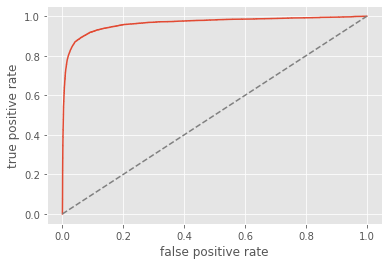

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], '--', color='grey')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                 cv=5, method='predict_proba' )
## methond = 'predict_prob'

In [41]:
y_scores_forest = y_pred_forest[:, 1]
y_pred_forest.shape, y_scores_forest.shape
## positive part 

((60000, 2), (60000,))

In [42]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

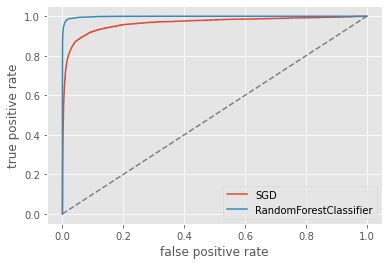

In [43]:
plot_roc_curve(fpr, tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='RandomForestClassifier')
plt.legend()
plt.show()

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9985468550688711

In [45]:
y_scores_forest_bool =  y_scores_forest >=0.5
y_train_5, y_scores_forest_bool

(array([ True, False, False, ...,  True, False, False]),
 array([ True, False, False, ...,  True, False, False]))

In [46]:
y_scores_forest_bool = y_scores_forest >=0.5
precision_forest, recall_forest, thresholds = precision_recall_curve(y_train_5, y_scores_forest_bool)
## precision_forest = precision_score(y_train_5, y_scores_forest_bool)
## recall_forest = recall_score(y_train_5, y_scores_forest_bool)
precision_forest, recall_forest, thresholds

(array([0.09035   , 0.99030128, 1.        ]),
 array([1.        , 0.88526102, 0.        ]),
 array([False,  True]))

In [47]:
## principle behind RandomForestClassifier 

## Multiclass Classification

In [48]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [49]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [50]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores, svm_clf.classes_

(array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
          9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]]),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object))

In [51]:
some_digit_index = np.argmax(some_digit_scores)
svm_clf.classes_[some_digit_index]
## argument of max 

'5'

In [52]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:6000], y_train[:6000],)
##mm

OneVsRestClassifier(estimator=SVC())

In [53]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [54]:
ovr_clf.decision_function([some_digit])

array([[-1.84965477, -2.0204178 , -1.35017272, -0.89327793, -3.08512613,
         0.99953535, -1.75835738, -1.31664691, -2.10870854, -1.95794039]])

In [55]:
## OvO strategy or OvR strategy
## SVC: origin ovo 
## SVC: using ocf from sklern.multiclass 
## SGD or RandomForestClassifier 

In [56]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [57]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [58]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [59]:
cross_val_score(sgd_clf, X_train, y_train,
                cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [60]:
## improve the model 
## StandardScalar 

In [61]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_train_scaled  = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train,
               cv=3, scoring='accuracy')
## astype(np.float64)
## StandardScaler: in chap02 
## z = (x - u) / s: u is mean, s is standard deviation

array([0.8983, 0.891 , 0.9018])

## Error Analysis 

In [62]:
## plt.matshow 

In [63]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled[:6000], y_train[:6000],
                                cv=3)

In [64]:
conf_matrix = confusion_matrix(y_train[:6000], y_train_pred)
conf_matrix

array([[569,   0,   1,   2,   1,  12,   4,   0,   3,   0],
       [  0, 637,   7,   2,   1,   5,   0,   1,  16,   2],
       [ 11,  11, 491,  11,  10,   4,  13,   9,  18,   3],
       [  3,   6,  21, 512,   1,  35,   1,   7,  12,  10],
       [  2,   2,   9,   0, 552,   2,  10,   9,  10,  27],
       [  5,   6,   5,  24,  13, 411,  10,   1,  25,  14],
       [  6,   6,   7,   0,   3,   7, 574,   1,   4,   0],
       [  3,   4,   7,   2,  10,   0,   1, 578,   3,  43],
       [  3,  18,  14,  16,   2,  12,   7,   3, 462,  14],
       [  9,   3,   5,   7,  16,   3,   0,  28,   8, 522]])

In [65]:
import pandas as pd 
classes_num = pd.Series(y_train[:6000]).value_counts()
classes_num = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_norm = conf_matrix / classes_num
## keepdims=True

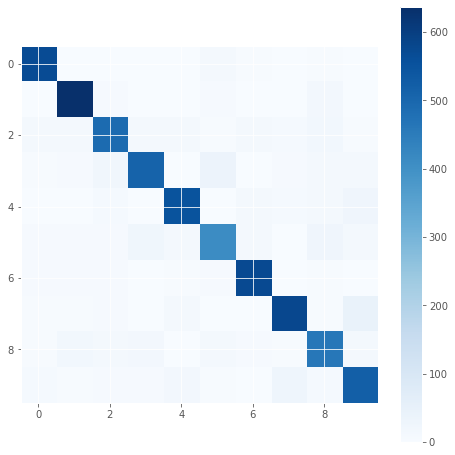

In [66]:
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.show()
## plt.matshow()
## interpolation='antialiased', 'nearest', 'bilinear'

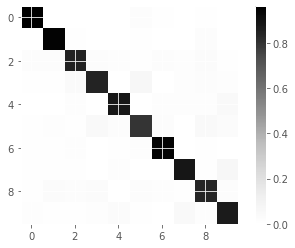

In [67]:
plt.imshow(conf_matrix_norm, cmap='Greys')
plt.colorbar()
plt.show()

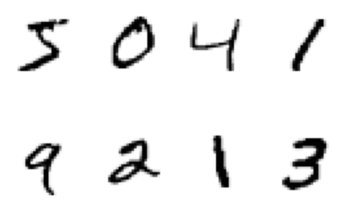

In [68]:
def plot_digits(some_digits):
    some_digits_img = some_digits.reshape(-1, 28, 28)
    rows = len(some_digits) // 4
    some_digits_img = some_digits_img[:rows*4]
    fig, axes = plt.subplots(rows, 4)
    for row in range(rows):
        for col in range(4): 
            axes[row, col].imshow(some_digits_img[row*4+col], cmap='Greys')
            axes[row, col].axis('off') 
plot_digits(some_digits[:11])
plt.show()

In [69]:
## if 'myVar' in in locals():
## if 'myVar' in globals():
try:
    name
except NameError:
    print('error')
## check if the variable exist 

error


## Multilabel Classification 

In [102]:
## recognize three faces in one picture 
from sklearn.neighbors import KNeighborsClassifier
y_train = y_train.astype(int)
## convert the type 
y_train_large = ( y_train >= 7 )
y_train_odd = (y_train % 2 ==1)
## get the mask 
y_multilabel = np.c_[y_train_large, y_train_odd]
## numpy.c_, numpy.stack 

In [106]:
knn_clf = KNeighborsClassifier()
knn_clf.fit( X_train, y_multilabel )

KNeighborsClassifier()

In [107]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
knn_clf_pre_cross = cross_val_predict(knn_clf, X_train, y_multilabel, cv =3 )

In [ ]:
f1_score( y_multilabel, knn_clf_pre_cross )

## Multioutput Classifcation 

In [ ]:
## where each label has multiclasss

In [72]:
## add noise 
from numpy import random 
noise_train = random.randint(0, 100, (len(X_train), 784))
noise_test = random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise_train
X_test_mod = X_test  + noise_test
y_train_mod = X_train
Y_test_mod = X_train
## input: nosiy image, output: cleaned image 

In [71]:
knn_clf.fit(X_train_mod, y_train_mod)

60000